# Lab 3
### Averaging Filters

http://scikit-image.org/docs/0.13.x/api/skimage.util.html#skimage.util.random_noise

http://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.median

http://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.gaussian

In [2]:
from commonfunctions import *
import math

%matplotlib inline
%load_ext autoreload
%autoreload 2

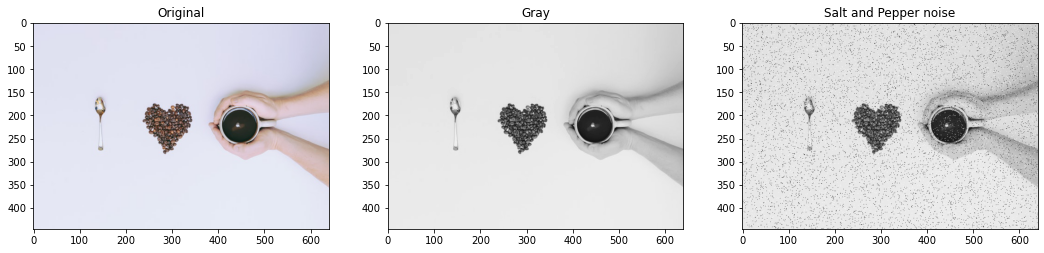

In [3]:
from statistics import mode


img=io.imread('coffee.jpeg')
grey=rgb2gray(img)
noisy=random_noise(grey,mode='s&p',amount=0.05)
show_images([img, grey, noisy], ['Original', 'Gray', 'Salt and Pepper noise'])

In [22]:
'''
(1) Your own median filter algorithm
'''

'''
def my_median(filter_size,img):
    edge_x=math.floor(filter_size/2)
    edge_y=math.floor(filter_size/2)
    image_height,image_width = img.shape
    for x in range(edge_x,image_width-edge_x):
        for y in range(edge_y,image_height-edge_y):
            color_array=np.zeros((filter_size,filter_size),dtype=uint8)
            for fx in range(filter_size):
                for fy in range(filter_size):
                    color_array[fy][fx]=img[y+fy-edge_y][x+fx-edge_x]
'''
def my_median(img):      
    color_array=np.array((3,3))
    new_img=np.copy(img)
    for i in range (1,img.shape[0]-1):
        for j in range (1,img.shape[1]-1):
            color_array=img[i-1:i+2 ,j-1:j+2]
            new_img[i][j]=np.median(color_array,axis=None)
    return  new_img  



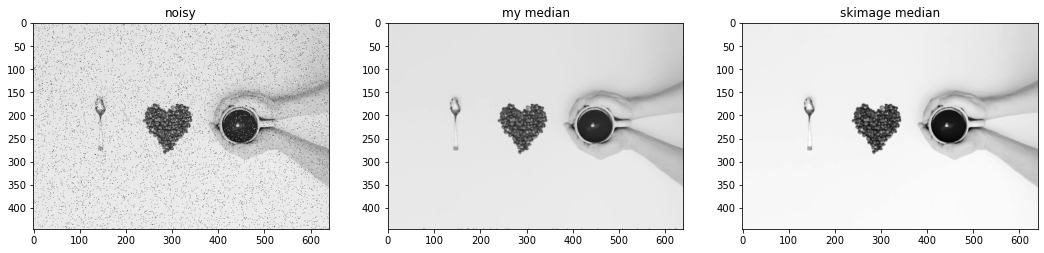

In [23]:
'''
(2) skimage median filter
'''
nor_median=my_median(noisy)
skimage_median=median(noisy)
show_images([noisy,nor_median,skimage_median],['noisy','my median','skimage median'])

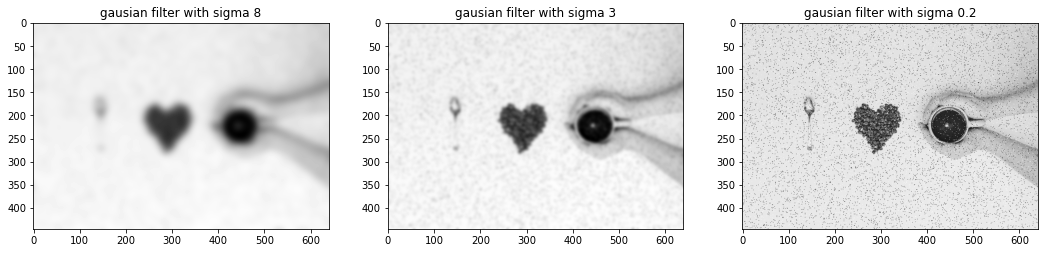

In [15]:
'''
(3) Gaussion Filters
'''
g8=gaussian(noisy,sigma=8)
g3=gaussian(noisy,sigma=3)
g02=gaussian(noisy,sigma=0.2)

show_images([g8,g3,g02],['gausian filter with sigma 8','gausian filter with sigma 3','gausian filter with sigma 0.2'])
